Este cuadernillo contiene todo el código empleado para realizar la parte de nuestro TFM relativa al análisis general y al análisis de miniaturas del dataset Youtube Trending Videos Global. Contiene las siguientes secciones:

- Instalación de subprogramas y librerías
- Lectura del dataset
- Obtención y análisis de características generales
- Obtención y análisis de características de miniaturas

## Instalación de subprogramas y librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import isodate #para manejar formato de duración ISO 8601
import re #para manejar expresiones regulares
from textblob import TextBlob
from lingua import Language, LanguageDetectorBuilder

## Lectura del dataset

In [28]:
# LECTURA DEL ARCHIVO
#df = pd.read_csv("videos_virales_final_plus.csv") #para análisis general
df = pd.read_csv("csv_final_merged.csv") #para miniaturas

C:\Users\belga\AppData\Local\Temp\ipykernel_28632\4181282695.py:2: DtypeWarning: Columns (2,3,11,13,18,19,21,24,26,27,34,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("csv_final_merged.csv")


## Obtención y análisis de características generales

In [29]:
df.columns

Index(['video_id', 'video_published_at', 'video_trending__date',
       'video_trending_country', 'channel_id', 'video_title',
       'video_description', 'video_default_thumbnail', 'video_category_id',
       'video_tags', 'video_duration', 'video_dimension', 'video_definition',
       'video_licensed_content', 'video_view_count', 'video_like_count',
       'video_comment_count', 'channel_title', 'channel_description',
       'channel_custom_url', 'channel_published_at', 'channel_country',
       'channel_view_count', 'channel_subscriber_count',
       'channel_have_hidden_subscribers', 'channel_video_count',
       'channel_localized_title', 'channel_localized_description',
       'thumbnail_url_hq', 'thumbnail_faces_count', 'title_length',
       'title_word_count', 'title_has_exclamation', 'title_has_question',
       'title_sentiment', 'title_has_keywords', 'title_uppercase_ratio',
       'description_length', 'description_sentiment', 'has_external_links',
       'tag_count', 'vid

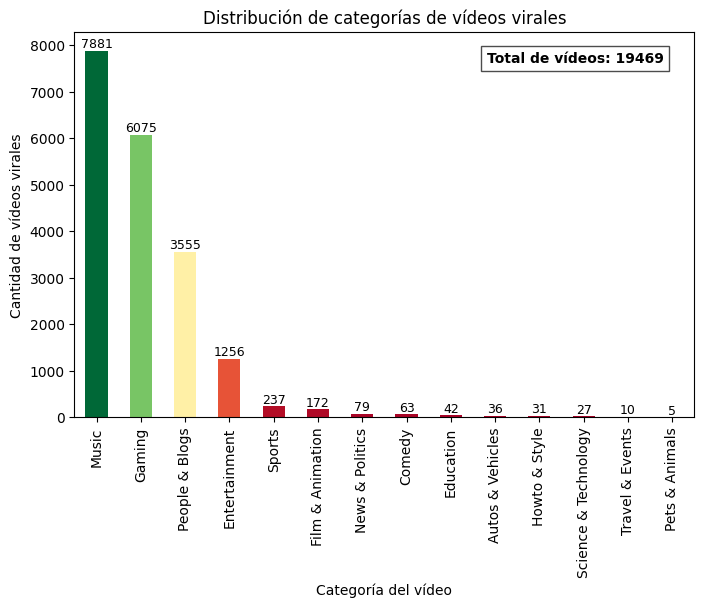

In [30]:
#Análisis de categorías
categories = df['video_category_id'].value_counts()
plt.figure(figsize=(8,5))
bars = categories.plot(kind='bar', color=plt.cm.RdYlGn(categories/categories.max()))

plt.title(f"Distribución de categorías de vídeos virales")
plt.xlabel("Categoría del vídeo")
plt.ylabel("Cantidad de vídeos virales")
plt.xticks(rotation=90)

plt.text(0.95, 0.95, f"Total de vídeos: {categories.sum()}", 
         ha="right", va="top", transform=plt.gca().transAxes,
         fontsize=10, fontweight="bold", bbox=dict(facecolor="white", alpha=0.7))

for i, value in enumerate(categories):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=9)

plt.show()

In [31]:
#Análisis de duración. Formato de la duración: ISO 8601
#Transformar todas las duraciones a segundos.
df["video_duration_segs"] = df["video_duration"].apply(lambda x: int(isodate.parse_duration(x).total_seconds()))
df['video_duration_segs'].describe()

count    19479.000000
mean      2890.563684
std       6268.480493
min          6.000000
25%        202.000000
50%        468.000000
75%       1812.000000
max      73561.000000
Name: video_duration_segs, dtype: float64

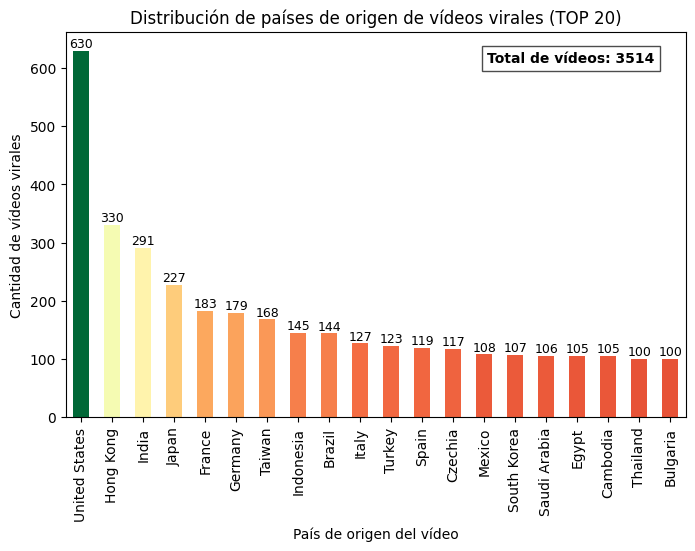

In [32]:
#País de origen de los vídeos
categories = df['channel_country'].value_counts()
categories = categories[0:20]
plt.figure(figsize=(8,5))
bars = categories.plot(kind='bar', color=plt.cm.RdYlGn(categories/categories.max()))

plt.title(f"Distribución de países de origen de vídeos virales (TOP 20)")
plt.xlabel("País de origen del vídeo")
plt.ylabel("Cantidad de vídeos virales")
plt.xticks(rotation=90)

plt.text(0.95, 0.95, f"Total de vídeos: {categories.sum()}", 
         ha="right", va="top", transform=plt.gca().transAxes,
         fontsize=10, fontweight="bold", bbox=dict(facecolor="white", alpha=0.7))

for i, value in enumerate(categories):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=9)

plt.show()

In [25]:
#Columnas para el idioma
languages = [Language.ENGLISH, Language.FRENCH, Language.GERMAN, Language.SPANISH, Language.ITALIAN, 
             Language.PORTUGUESE, Language.ARABIC, Language.THAI, Language.HINDI, Language.CHINESE, Language.INDONESIAN, 
             Language.RUSSIAN, Language.POLISH, Language.JAPANESE]
detector = LanguageDetectorBuilder.from_languages(*languages).with_preloaded_language_models().build()
df['video_title_language'] = df['video_title'].apply(lambda x: str(detector.detect_language_of(str(x)))[9:])
df['vtl_confidence'] =  df['video_title'].apply(lambda x: detector.compute_language_confidence_values(str(x))[0].value)

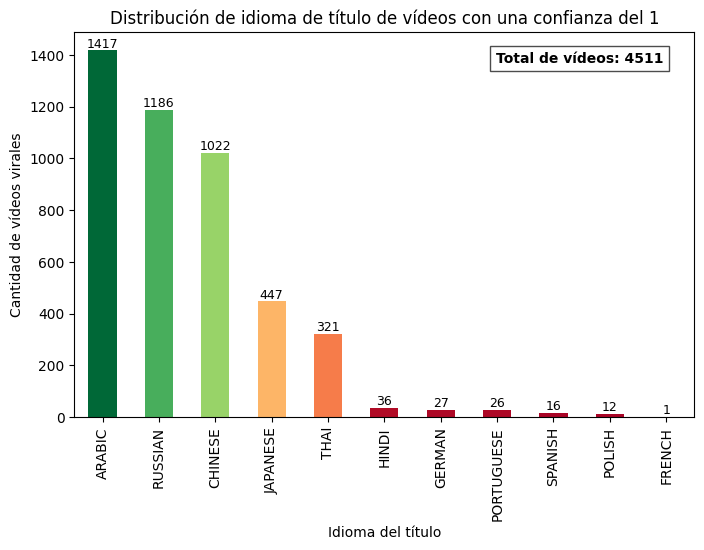

In [26]:
#Idioma de los títulos
confianza = 1 #parámetro modificable
categories = df[df['vtl_confidence'] >= confianza]['video_title_language'].value_counts()
#categories = categories[0:20]
plt.figure(figsize=(8,5))
bars = categories.plot(kind='bar', color=plt.cm.RdYlGn(categories/categories.max()))

plt.title(f"Distribución de idioma de título de vídeos con una confianza del {confianza}")
plt.xlabel("Idioma del título")
plt.ylabel("Cantidad de vídeos virales")
plt.xticks(rotation=90)

plt.text(0.95, 0.95, f"Total de vídeos: {categories.sum()}", 
         ha="right", va="top", transform=plt.gca().transAxes,
         fontsize=10, fontweight="bold", bbox=dict(facecolor="white", alpha=0.7))

for i, value in enumerate(categories):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=9)

plt.show()


## Obtención y análisis de características de miniaturas

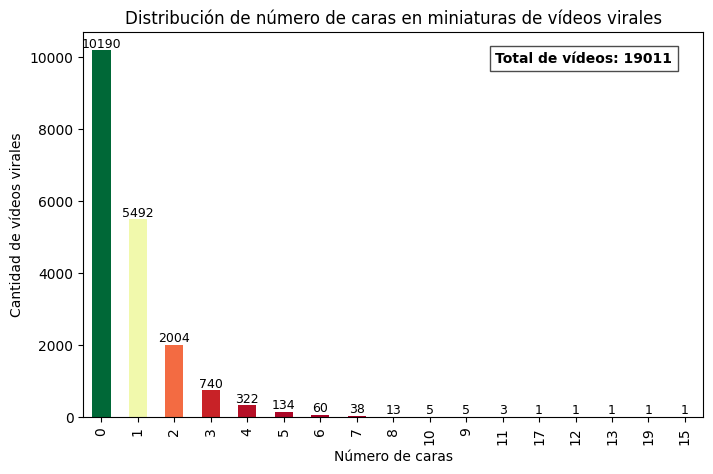

In [48]:
#Cantidad de caras de la miniatura
categories = df[df['thumbnail_faces_count'] >= 0]['thumbnail_faces_count'].value_counts()
plt.figure(figsize=(8,5))
bars = categories.plot(kind='bar', color=plt.cm.RdYlGn(categories/categories.max()))

plt.title(f"Distribución de número de caras en miniaturas de vídeos virales")
plt.xlabel("Número de caras")
plt.ylabel("Cantidad de vídeos virales")
plt.xticks(rotation=90)

plt.text(0.95, 0.95, f"Total de vídeos: {categories.sum()}", 
         ha="right", va="top", transform=plt.gca().transAxes,
         fontsize=10, fontweight="bold", bbox=dict(facecolor="white", alpha=0.7))

for i, value in enumerate(categories):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=9)

plt.show()

C:\Users\belga\AppData\Local\Temp\ipykernel_28632\340963690.py:3: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  categories = categories[0:21]


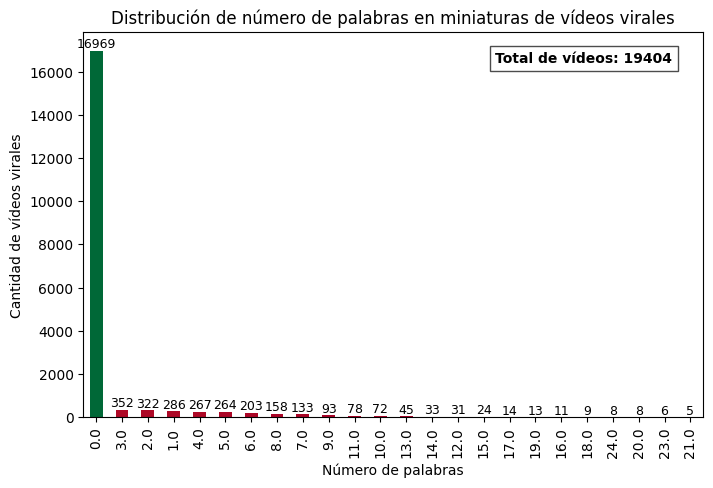

In [51]:
#Cantidad de texto de la miniatura
categories = df[df['thumbnail_text_count'] >= 0]['thumbnail_text_count'].value_counts()
categories = categories[0:21]
plt.figure(figsize=(8,5))
bars = categories.plot(kind='bar', color=plt.cm.RdYlGn(categories/categories.max()))

plt.title(f"Distribución de número de palabras en miniaturas de vídeos virales")
plt.xlabel("Número de palabras")
plt.ylabel("Cantidad de vídeos virales")
plt.xticks(rotation=90)

plt.text(0.95, 0.95, f"Total de vídeos: {categories.sum()}", 
         ha="right", va="top", transform=plt.gca().transAxes,
         fontsize=10, fontweight="bold", bbox=dict(facecolor="white", alpha=0.7))

for i, value in enumerate(categories):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=9)

plt.show()

In [52]:
#Análisis de colorido.
df['thumbnail_colorfulness'].describe()

count    19479.000000
mean        53.549260
std         29.865895
min          0.000000
25%         32.272128
50%         50.463567
75%         72.808832
max        186.607929
Name: thumbnail_colorfulness, dtype: float64